In [1]:
### import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("churn-bigml-80.csv")                              ###  dataset load

In [4]:
### dataset analyzing 

for i in range(1,2):
    print("SHAPE:")    
    print(df.shape)
    print("COLUMNS:")  
    print(df.columns)
    print("HEAD:")     
    print(df.head(2))
    print("DESCRIBE:")           
    print(df.describe())
    print("INFO:")
    print(df.info())

SHAPE:
(2666, 20)
COLUMNS:
Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')
HEAD:
  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             4

In [5]:
#object:- International plan,Voice mail plan
df.replace({'International plan':{'Yes':1,'No':0},
            'Voice mail plan':{'Yes':1,'No':0}},inplace=True)

df.head(2) #"Churn" - can't change , "state" - unnessary

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [6]:
#COUNTPLOT - International plan, Voice mail plan,
#HISTPLOT  - Account length, Area code, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge    

In [7]:
df.isnull().sum().sum()                                     #total no of null values      

0

In [8]:
df.isnull().sum()                                           ### to find null values in each column

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [9]:
for i in range(1,2,1):
    print("CHURN:")    
    print(df["Churn"].value_counts())
    print("INTERNATIONAL PLAN:")    
    print(df["International plan"].value_counts())
    print("VOICE MAIL PLAN:")    
    print(df["Voice mail plan"].value_counts())

CHURN:
False    2278
True      388
Name: Churn, dtype: int64
INTERNATIONAL PLAN:
0    2396
1     270
Name: International plan, dtype: int64
VOICE MAIL PLAN:
0    1933
1     733
Name: Voice mail plan, dtype: int64


<AxesSubplot:>

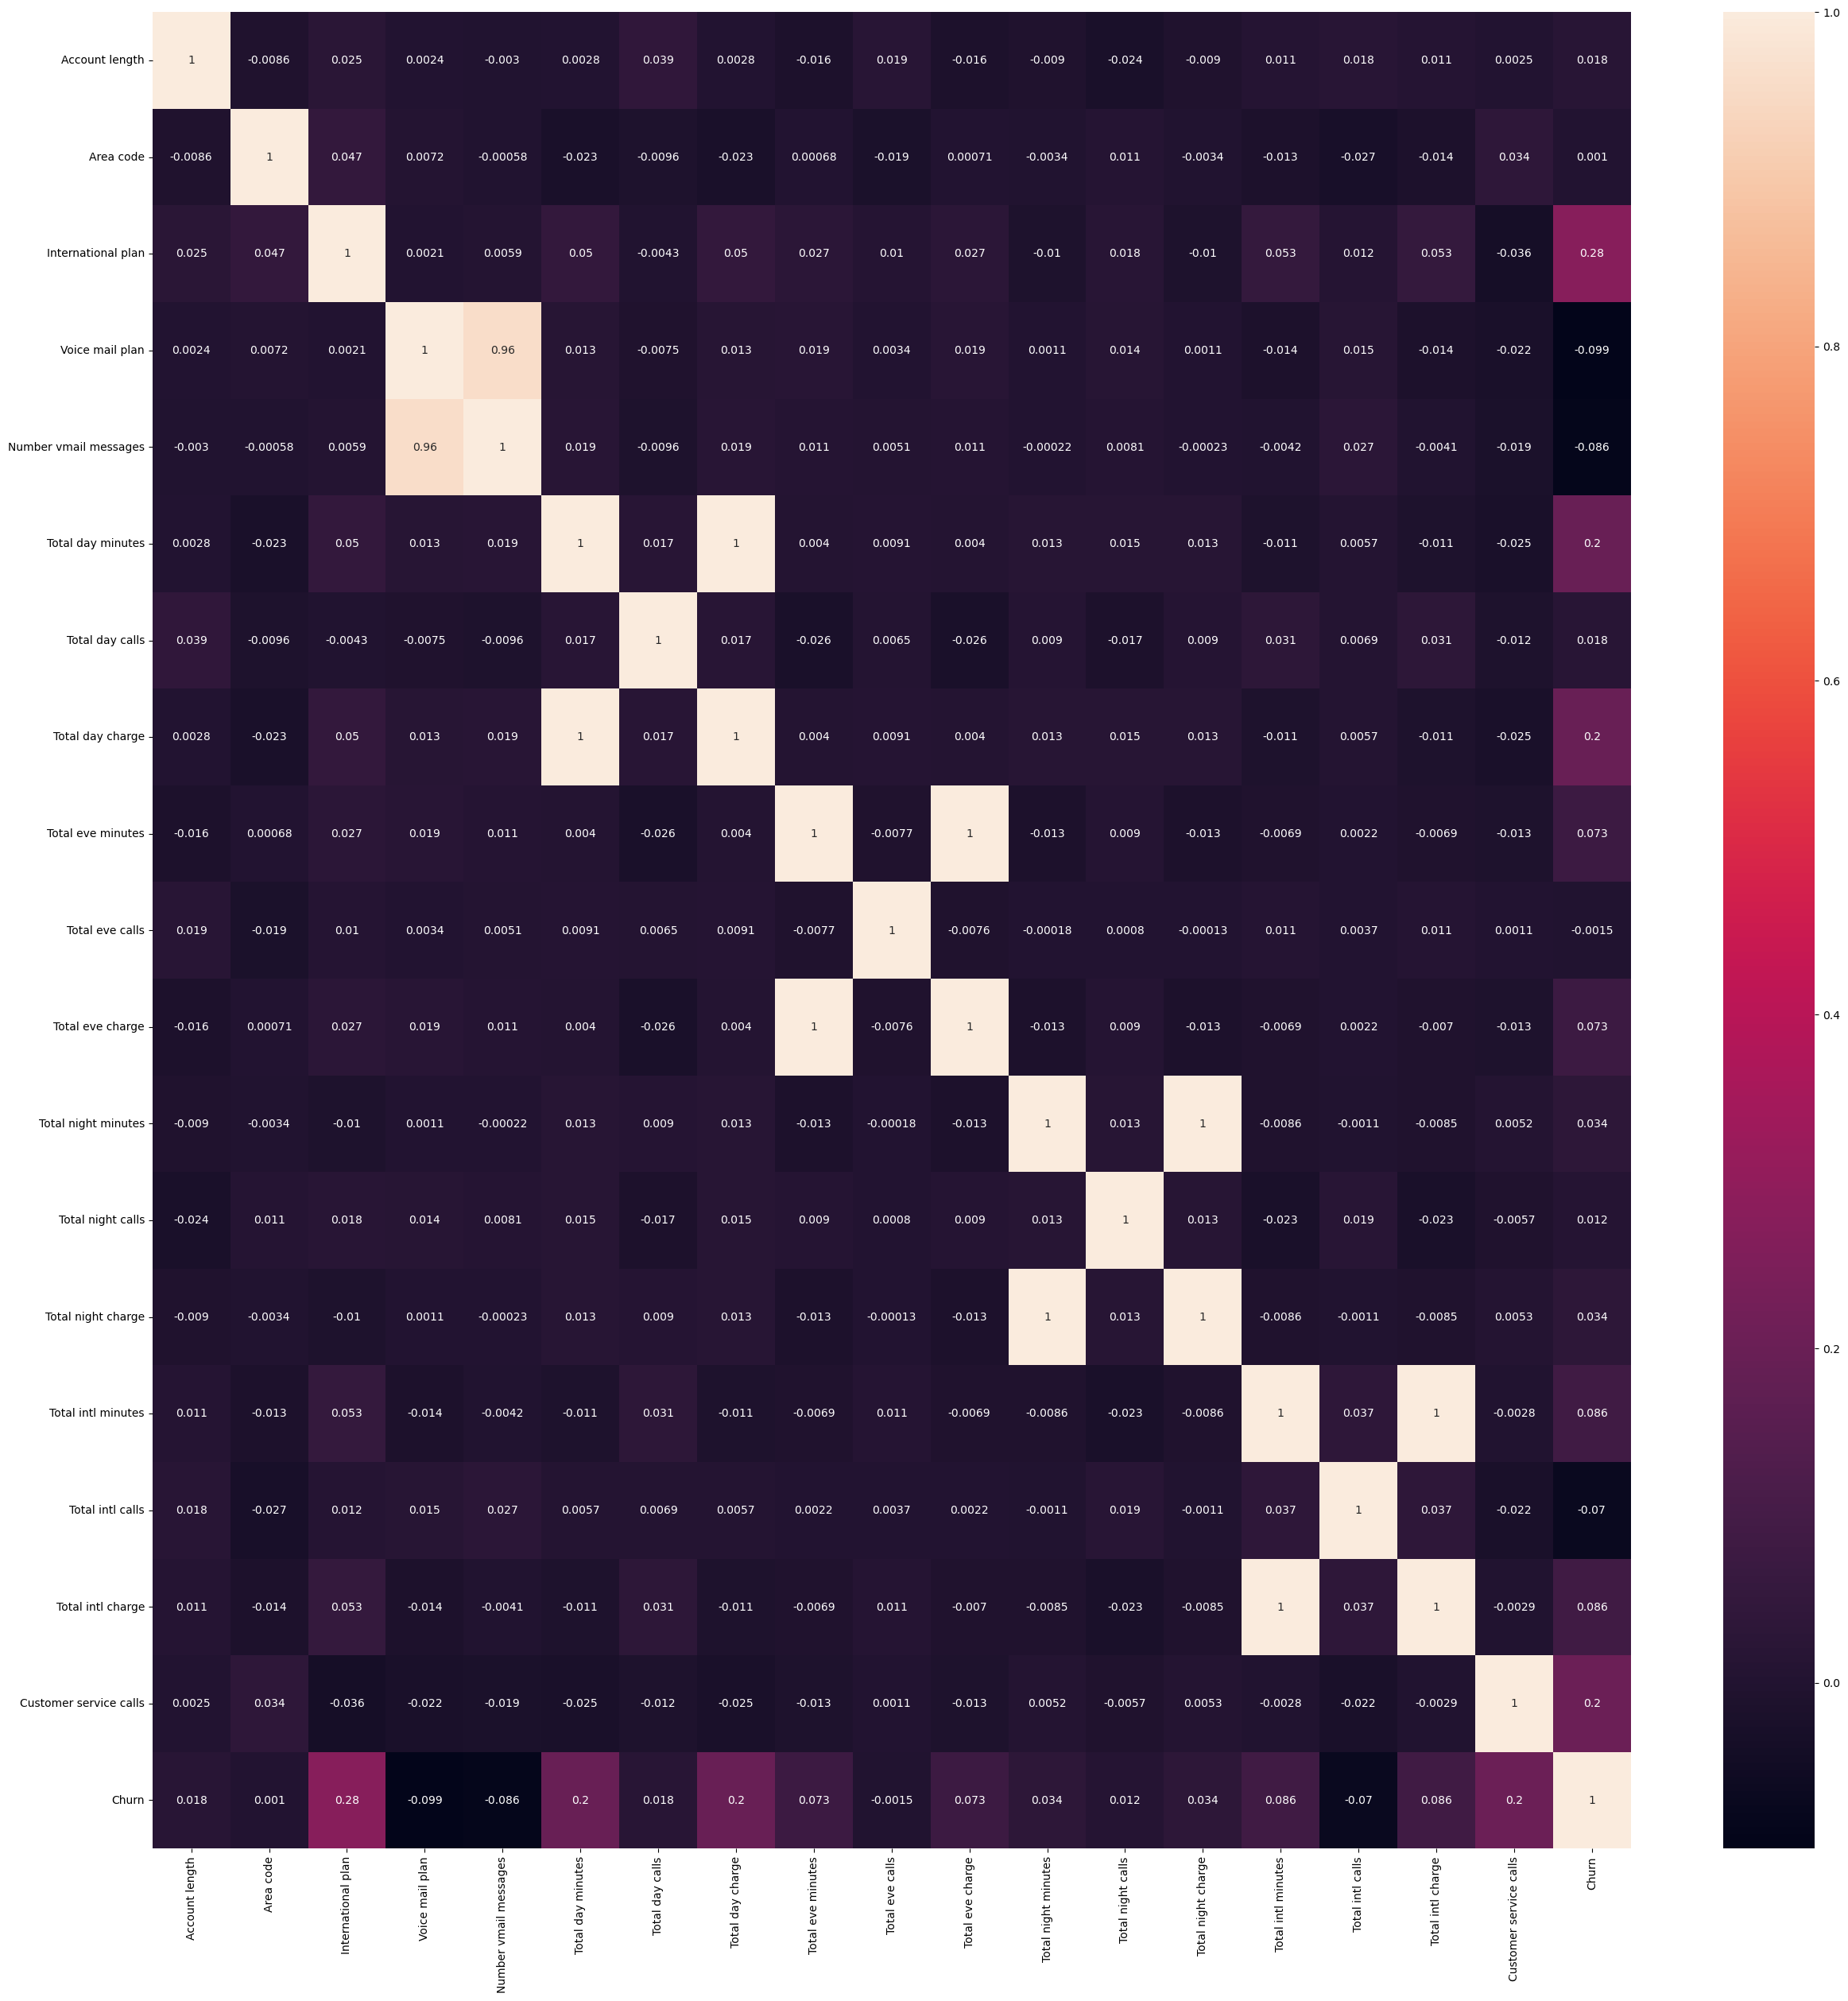

In [10]:
### dataset visualization
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)

In [11]:
##POSITIVE CORRELATION:-
#"total day charge" has positively correlation with "total day minutes"(corr-1) 
#"number vmail message" has positively correlation with "voice mail plan"(corr-0.96)
#"total intl minutes" has positively correlation with "total intl charge"(corr-1)

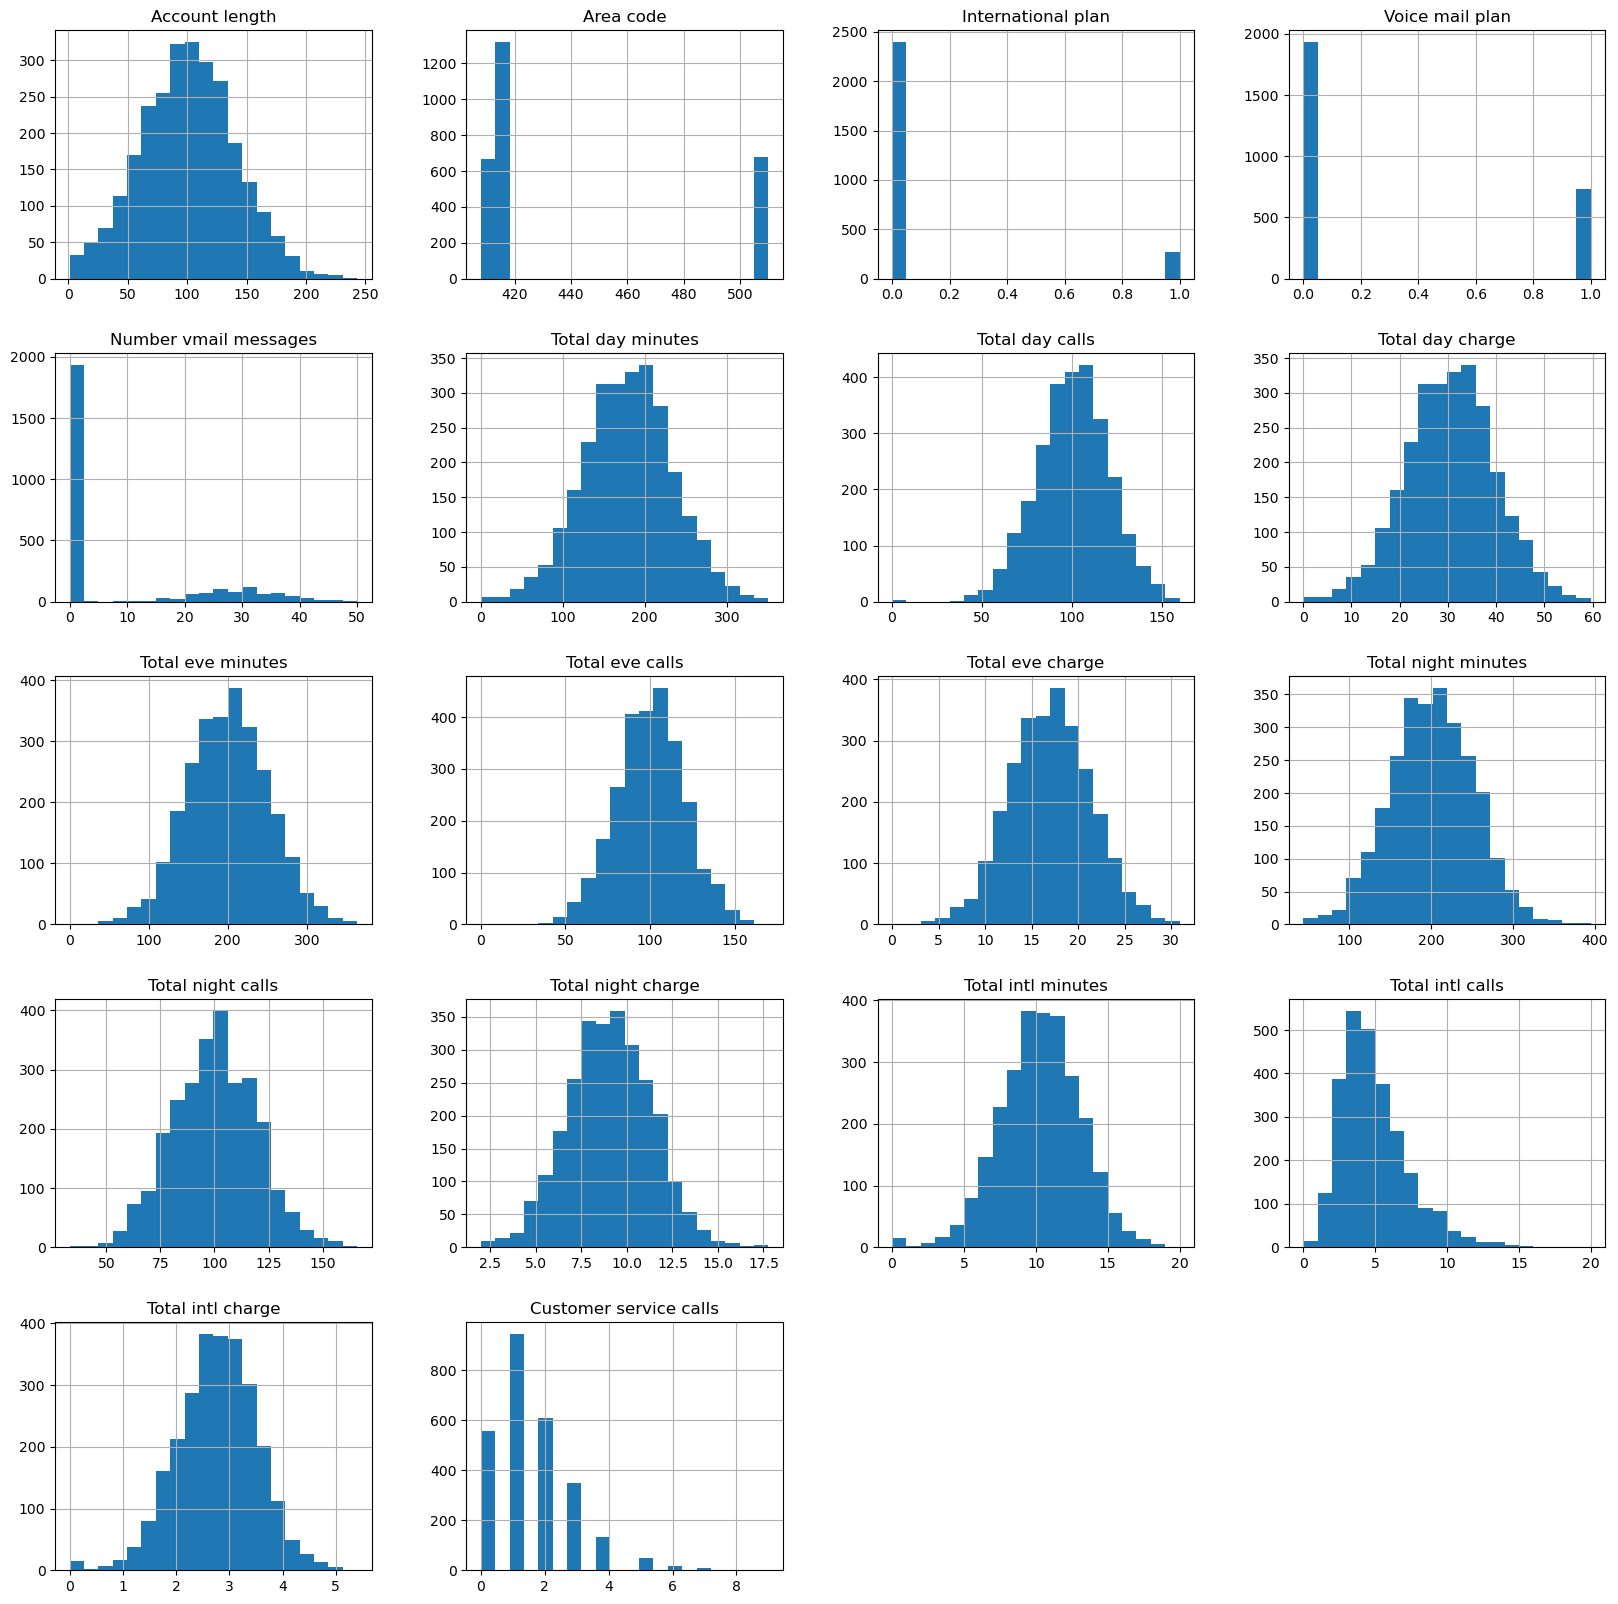

In [12]:
df.hist(bins=20, figsize=(20,20))               
plt.show() 

<AxesSubplot:xlabel='International plan', ylabel='count'>

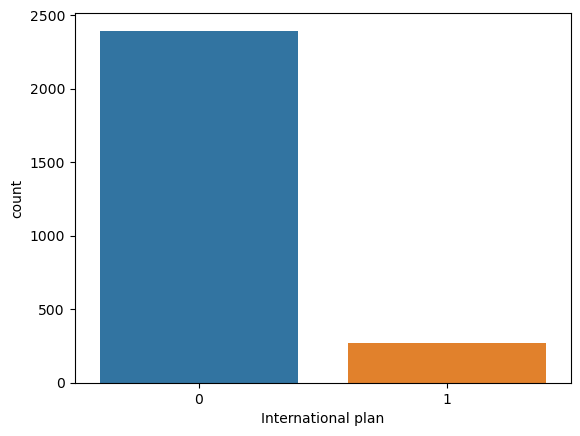

In [13]:
sns.countplot(x="International plan",data=df)

<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

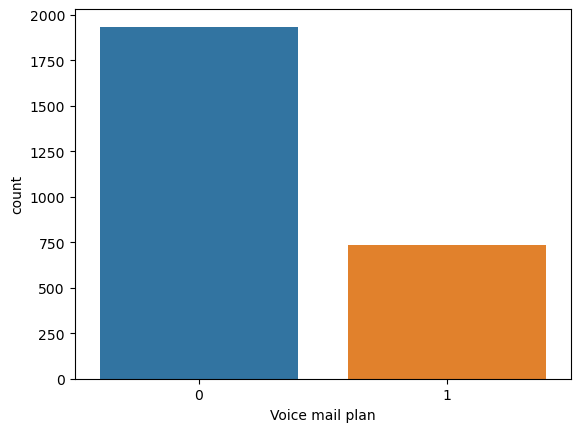

In [14]:
sns.countplot(x="Voice mail plan",data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

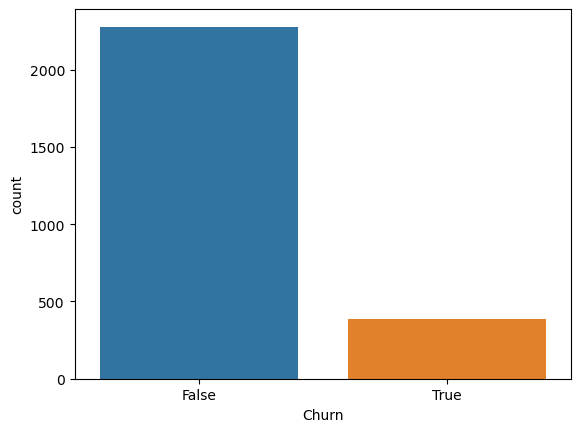

In [15]:
sns.countplot(x="Churn",data=df)

In [16]:
### Features and Labels
y = df["Churn"]
x = df.drop(["Churn","State"],axis=1)                               

In [17]:
from sklearn.model_selection import train_test_split                 ###  traintestsplit
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size = 0.2,random_state = 2)

In [18]:
from sklearn.metrics import accuracy_score
### CLASSIFICATION ALGORITHMS
from sklearn.linear_model import LogisticRegression          #1
from sklearn.svm import SVC                                  #2
from sklearn.tree import DecisionTreeClassifier              #3
from sklearn.naive_bayes import GaussianNB                   #4
from sklearn.ensemble import RandomForestClassifier          #5
#from sklearn.neighbors import KNeighborsClassifier           #6

In [19]:
# 1.LogisticRegression
m1 = LogisticRegression()
m1.fit(xtrain, ytrain)                      #model training
m1pred = m1.predict(xtest)                   #model evaluation
accuracy_score(ytest, m1pred)

0.8689138576779026

In [20]:
# 2.SVC
m2 = SVC()
m2.fit(xtrain, ytrain)                  
m2pred = m2.predict(xtest)                   
accuracy_score(ytest, m2pred)

0.8632958801498127

In [21]:
# 3.DecisionTreeClassifier
m3 = DecisionTreeClassifier()
m3.fit(xtrain, ytrain)                      
m3pred = m3.predict(xtest)               
accuracy_score(ytest, m3pred)

0.9119850187265918

In [22]:
# 4.GaussianNB
GaussianNB
m4 = GaussianNB()
m4.fit(xtrain, ytrain)                      
m4pred = m4.predict(xtest)               
accuracy_score(ytest, m4pred)

0.8651685393258427

In [23]:
# 5.RandomForestClassifier
m5 = RandomForestClassifier()
m5.fit(xtrain, ytrain)                      
m5pred = m5.predict(xtest)               
accuracy_score(ytest, m5pred)

0.9606741573033708

In [24]:
###accuracy score of all algorithms.
#LogisticRegression      -  0.86        
#SVC                     -  0.86             
#DecisionTreeClassifier  -  0.91           
#GaussianNB              -  0.86    
#RandomForestClassifier  -  0.96           